# How close are previous algorithms to the smallest possible sample size and how much closer can we get with SampLNS

We don't know the actual smallest possible sample sizes, but we have a lower bound that we can use.


Let us first load the data from the experiment with solved each of the 44 small to medium instance 5 times with each of the previous algorithms. Then these samples were optimized for 900s by SampLNS.

In [38]:
import pandas as pd

In [39]:
samplns_data = pd.read_json("./05_clean_data.json.zip")
baseline_data = pd.read_json("./00_simple_baseline_data.json.zip")
from _conf import EXTENDED_BASELINE_DATA

extended_baseline_data = pd.read_json(EXTENDED_BASELINE_DATA)
extended_baseline_data = pd.concat([baseline_data, extended_baseline_data])
baseline_data

,instance_name,num_vars,num_clauses,baseline_alg,baseline_alg_conf,runtime,sample_size,path_to_baseline_sample
0,calculate,9,15,FIDE-ICPL,t2,1.484,9.0,2023-03-01_13-51-03/1_1_0_1_sample.csv
1,calculate,9,15,FIDE-ICPL,t2,1.280,9.0,2023-03-01_13-51-03/1_1_0_2_sample.csv
2,calculate,9,15,FIDE-ICPL,t2,1.289,9.0,2023-03-01_13-51-03/1_1_0_3_sample.csv
3,calculate,9,15,FIDE-ICPL,t2,1.274,9.0,2023-03-01_13-51-03/1_1_0_4_sample.csv
4,calculate,9,15,FIDE-ICPL,t2,1.277,9.0,2023-03-01_13-51-03/1_1_0_5_sample.csv
...,...,...,...,...,...,...,...,...
2745,freetz,31012,102705,YASA,t2_m10_null,900.008,NaN,None
2746,freetz,31012,102705,YASA,t2_m10_null,900.008,NaN,None
2747,freetz,31012,102705,YASA,t2_m10_null,900.010,NaN,None
2748,freetz,31012,102705,YASA,t2_m10_null,900.009,NaN,None


In [40]:
extended_baseline_data

,instance_name,num_vars,num_clauses,baseline_alg,baseline_alg_conf,runtime,sample_size,path_to_baseline_sample,archive_path
0,calculate,9,15,FIDE-ICPL,t2,1.484,9.0,2023-03-01_13-51-03/1_1_0_1_sample.csv,NaN
1,calculate,9,15,FIDE-ICPL,t2,1.280,9.0,2023-03-01_13-51-03/1_1_0_2_sample.csv,NaN
2,calculate,9,15,FIDE-ICPL,t2,1.289,9.0,2023-03-01_13-51-03/1_1_0_3_sample.csv,NaN
3,calculate,9,15,FIDE-ICPL,t2,1.274,9.0,2023-03-01_13-51-03/1_1_0_4_sample.csv,NaN
4,calculate,9,15,FIDE-ICPL,t2,1.277,9.0,2023-03-01_13-51-03/1_1_0_5_sample.csv,NaN
...,...,...,...,...,...,...,...,...,...
2945,freetz,31012,102705,YASA,t2_m10_null,900008.000,NaN,None,./EXTERNAL_INPUT/900_seconds_5_it.zip
2946,freetz,31012,102705,YASA,t2_m10_null,900008.000,NaN,None,./EXTERNAL_INPUT/900_seconds_5_it.zip
2947,freetz,31012,102705,YASA,t2_m10_null,900010.000,NaN,None,./EXTERNAL_INPUT/900_seconds_5_it.zip
2948,freetz,31012,102705,YASA,t2_m10_null,900009.000,NaN,None,./EXTERNAL_INPUT/900_seconds_5_it.zip


In [41]:
baseline_data = extended_baseline_data

In [42]:
best_lower_bound = (
    samplns_data.groupby(["instance_name"])["lower_bound"]
    .max()
    .reset_index()
    .rename(columns={"lower_bound": "best_lower_bound"})
)
best_lower_bound.to_json("./out/07_best_lower_bounds.json.zip")
best_lower_bound

,instance_name,best_lower_bound
0,APL,7
1,APL-Model,8
2,BankingSoftware,28
3,BattleofTanks,256
4,ChatClient,7
5,DMIE,16
6,E-Shop,8
7,EMBToolkit,1841
8,FameDB,8
9,FeatureIDE,7


In [43]:
best_lower_bound["internal_best"] = best_lower_bound["best_lower_bound"]
from _conf import EXTERNAL_BOUNDS

external_best_lb = (
    pd.concat([pd.read_csv(p) for p in EXTERNAL_BOUNDS])
    .groupby(["instance_name"])["best_lower_bound"]
    .max()
    .reset_index()
)
best_lower_bound = (
    pd.concat([best_lower_bound, external_best_lb])
    .groupby(["instance_name"])[["best_lower_bound", "internal_best"]]
    .max()
    .reset_index()
)
best_lower_bound

,instance_name,best_lower_bound,internal_best
0,APL,7,7.0
1,APL-Model,8,8.0
2,BankingSoftware,28,28.0
3,BattleofTanks,256,256.0
4,ChatClient,7,7.0
5,DMIE,16,16.0
6,E-Shop,10,8.0
7,EMBToolkit,1872,1841.0
8,FameDB,8,8.0
9,FeatureIDE,7,7.0


In [44]:
samplns_data = samplns_data[["instance_name", "upper_bound"]]
samplns_data = samplns_data.merge(best_lower_bound, on="instance_name")
samplns_data["gap"] = 100 * (
    1 - (samplns_data["best_lower_bound"] / samplns_data["upper_bound"])
)
samplns_data["algorithm_name"] = "SampLNS"
samplns_data

,instance_name,upper_bound,best_lower_bound,internal_best,gap,algorithm_name
0,integrator_arm7,47,33,32.0,29.787234,SampLNS
1,integrator_arm7,47,33,32.0,29.787234,SampLNS
2,integrator_arm7,44,33,32.0,25.000000,SampLNS
3,integrator_arm7,46,33,32.0,28.260870,SampLNS
4,integrator_arm7,43,33,32.0,23.255814,SampLNS
...,...,...,...,...,...,...
225,FreeBSD-8_0_0,64,30,30.0,53.125000,SampLNS
226,FreeBSD-8_0_0,68,30,30.0,55.882353,SampLNS
227,FreeBSD-8_0_0,63,30,30.0,52.380952,SampLNS
228,FreeBSD-8_0_0,63,30,30.0,52.380952,SampLNS


In [45]:
baseline_data = baseline_data[
    ["instance_name", "sample_size", "baseline_alg", "baseline_alg_conf"]
]
baseline_data = baseline_data.merge(best_lower_bound, on="instance_name")

baseline_data["gap"] = 100 * (
    (baseline_data["sample_size"] / baseline_data["best_lower_bound"]) - 1
)


def baseline_alg_name(row):
    settings = row["baseline_alg_conf"]
    if "_m" in settings:
        m = settings.split("_m")[-1].split("_")[0]
        return f"{row['baseline_alg']}(m={m})"
    return row["baseline_alg"]


baseline_data["algorithm_name"] = baseline_data.apply(baseline_alg_name, axis=1)
# baseline_data.rename(columns={"baseline_alg": "Algorithm"})
baseline_data

,instance_name,sample_size,baseline_alg,baseline_alg_conf,best_lower_bound,internal_best,gap,algorithm_name
0,calculate,9.0,FIDE-ICPL,t2,5,5.0,80.000000,FIDE-ICPL
1,calculate,9.0,FIDE-ICPL,t2,5,5.0,80.000000,FIDE-ICPL
2,calculate,9.0,FIDE-ICPL,t2,5,5.0,80.000000,FIDE-ICPL
3,calculate,9.0,FIDE-ICPL,t2,5,5.0,80.000000,FIDE-ICPL
4,calculate,9.0,FIDE-ICPL,t2,5,5.0,80.000000,FIDE-ICPL
...,...,...,...,...,...,...,...,...
5239,ea2468,65.0,YASA,t2_m10_null,31,31.0,109.677419,YASA(m=10)
5240,ea2468,65.0,YASA,t2_m10_null,31,31.0,109.677419,YASA(m=10)
5241,ea2468,65.0,YASA,t2_m10_null,31,31.0,109.677419,YASA(m=10)
5242,ea2468,65.0,YASA,t2_m10_null,31,31.0,109.677419,YASA(m=10)


In [46]:
gaps = pd.concat(
    [
        samplns_data[["algorithm_name", "instance_name", "gap"]],
        baseline_data[["algorithm_name", "instance_name", "gap"]],
    ]
)
gaps

,algorithm_name,instance_name,gap
0,SampLNS,integrator_arm7,29.787234
1,SampLNS,integrator_arm7,29.787234
2,SampLNS,integrator_arm7,25.000000
3,SampLNS,integrator_arm7,28.260870
4,SampLNS,integrator_arm7,23.255814
...,...,...,...
5239,YASA(m=10),ea2468,109.677419
5240,YASA(m=10),ea2468,109.677419
5241,YASA(m=10),ea2468,109.677419
5242,YASA(m=10),ea2468,109.677419


In [47]:
gaps["algorithm_name"].unique().tolist()

['SampLNS',
 'FIDE-ICPL',
 'FIDE-Chvatal',
 'Incling',
 'FIDE-YASA(m=1)',
 'FIDE-YASA(m=3)',
 'FIDE-YASA(m=5)',
 'FIDE-YASA(m=10)',
 'YASA(m=1)',
 'YASA(m=3)',
 'YASA(m=5)',
 'YASA(m=10)',
 'ACTS-IPOG-FT',
 'ACTS-IPOG-CSP',
 'ACTS-IPOF-FT',
 'ACTS-IPOF-CSP']

In [48]:
algorithm_selection = [
    "SampLNS",
    "FIDE-ICPL",
    "FIDE-Chvatal",
    "Incling",
    "FIDE-YASA(m=1)",
    "FIDE-YASA(m=3)",
    "FIDE-YASA(m=5)",
    "FIDE-YASA(m=10)",
    "ACTS-IPOG-FT",
    "ACTS-IPOG-CSP",
    "ACTS-IPOF-FT",
    "ACTS-IPOF-CSP",
]
t = gaps[gaps["algorithm_name"].isin(algorithm_selection)].copy()
t.dropna(inplace=True)
t = t.groupby("instance_name")[["algorithm_name"]].nunique()
instances_solved_by_all = t[
    t["algorithm_name"] == len(algorithm_selection)
].index.tolist()
instances_solved_by_all

['APL',
 'APL-Model',
 'ChatClient',
 'FameDB',
 'FeatureIDE',
 'SortingLine',
 'TightVNC',
 'Violet',
 'axTLS',
 'busybox_2007-01-24_09-14-09',
 'busybox_2020-12-16_21-53-05',
 'calculate',
 'car',
 'dell',
 'email',
 'gpl',
 'lcm',
 'soletta_2015-06-26_18-38-56',
 'toybox_2006-10-31_23-30-06',
 'toybox_2020-12-06_00-02-46']

In [49]:
print(len(instances_solved_by_all), "instances solved by all")

20 instances solved by all


In [50]:
t = gaps[gaps["instance_name"].isin(instances_solved_by_all)].copy()
t["Instances"] = f"Common subset [{len(instances_solved_by_all)}]"
gaps["Instances"] = "Ignore unsolved"
gaps = pd.concat([gaps, t], ignore_index=True)
gaps

,algorithm_name,instance_name,gap,Instances
0,SampLNS,integrator_arm7,29.787234,Ignore unsolved
1,SampLNS,integrator_arm7,29.787234,Ignore unsolved
2,SampLNS,integrator_arm7,25.000000,Ignore unsolved
3,SampLNS,integrator_arm7,28.260870,Ignore unsolved
4,SampLNS,integrator_arm7,23.255814,Ignore unsolved
...,...,...,...,...
7849,YASA(m=10),busybox_2020-12-16_21-53-05,94.736842,Common subset [20]
7850,YASA(m=10),busybox_2020-12-16_21-53-05,94.736842,Common subset [20]
7851,YASA(m=10),busybox_2020-12-16_21-53-05,94.736842,Common subset [20]
7852,YASA(m=10),busybox_2020-12-16_21-53-05,94.736842,Common subset [20]


In [51]:
gaps["solved"] = 0.0
gaps.loc[~gaps["gap"].isna(), "solved"] = 1
gaps.groupby(["algorithm_name"])[["gap"]].mean()

,gap
algorithm_name,
ACTS-IPOF-CSP,71.493888
ACTS-IPOF-FT,74.533881
ACTS-IPOG-CSP,78.478908
ACTS-IPOG-FT,81.312735
FIDE-Chvatal,87.412484
FIDE-ICPL,87.919095
FIDE-YASA(m=1),68.275066
FIDE-YASA(m=10),49.075496
FIDE-YASA(m=3),54.153749


In [52]:
num_instances_solved_by_alg = (
    gaps.dropna().groupby("algorithm_name")["instance_name"].nunique().to_dict()
)
num_instances_solved_by_alg

{'ACTS-IPOF-CSP': 21,
 'ACTS-IPOF-FT': 23,
 'ACTS-IPOG-CSP': 22,
 'ACTS-IPOG-FT': 23,
 'FIDE-Chvatal': 37,
 'FIDE-ICPL': 45,
 'FIDE-YASA(m=1)': 46,
 'FIDE-YASA(m=10)': 46,
 'FIDE-YASA(m=3)': 46,
 'FIDE-YASA(m=5)': 46,
 'Incling': 45,
 'SampLNS': 46,
 'YASA(m=1)': 46,
 'YASA(m=10)': 46,
 'YASA(m=3)': 46,
 'YASA(m=5)': 46}

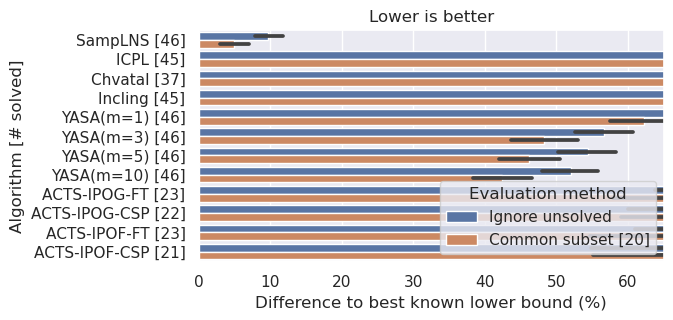

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

t = gaps[gaps["algorithm_name"].isin(algorithm_selection)].copy()

f, ax = plt.subplots(figsize=(6, 3))
t["algorithm_name"] = t["algorithm_name"].apply(
    lambda s: f"{s} [{num_instances_solved_by_alg[s]}]"
)
t["algorithm_name"] = t["algorithm_name"].str.replace("FIDE-", "")
plt.title("Lower is better")
sns.barplot(data=t, y="algorithm_name", x="gap", hue="Instances")
plt.xlabel("Difference to best known lower bound (%)")
plt.ylabel("Algorithm [# solved]")
plt.legend(loc="lower right", title="Evaluation method")
plt.xlim(0, 65)
plt.show()

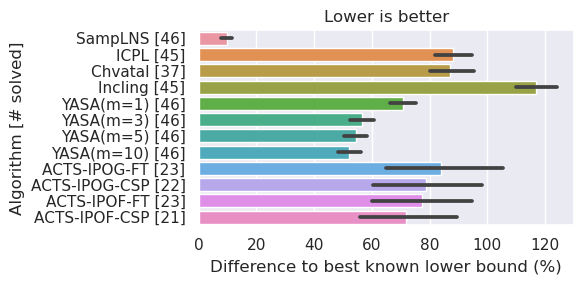

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

t = gaps[gaps["algorithm_name"].isin(algorithm_selection)].copy()
t = t[t["Instances"] == "Ignore unsolved"]
f, ax = plt.subplots(figsize=(6, 3))
t["algorithm_name"] = t["algorithm_name"].apply(
    lambda s: f"{s} [{num_instances_solved_by_alg[s]}]"
)
t["algorithm_name"] = t["algorithm_name"].str.replace("FIDE-", "")
plt.title("Lower is better")
sns.barplot(data=t, y="algorithm_name", x="gap")
plt.xlabel("Difference to best known lower bound (%)")
plt.ylabel("Algorithm [# solved]")
# plt.legend(loc="lower right", title="Evaluation method")
plt.xlim(0, 130)
plt.tight_layout()
plt.show()

In [55]:
# How many instances have been solved to optimality by the baseline algorithms? (Note that this is a lower bound)
t = gaps.groupby(["algorithm_name", "instance_name"])[["gap"]].min() == 0
t.reset_index().groupby("algorithm_name").sum()

,instance_name,gap
algorithm_name,,
ACTS-IPOF-CSP,APLAPL-ModelBankingSoftwareBattleofTanksChatCl...,0
ACTS-IPOF-FT,APLAPL-ModelBankingSoftwareBattleofTanksChatCl...,0
ACTS-IPOG-CSP,APLAPL-ModelBankingSoftwareBattleofTanksChatCl...,0
ACTS-IPOG-FT,APLAPL-ModelBankingSoftwareBattleofTanksChatCl...,0
FIDE-Chvatal,APLAPL-ModelBankingSoftwareBattleofTanksChatCl...,0
FIDE-ICPL,APLAPL-ModelBankingSoftwareBattleofTanksChatCl...,0
FIDE-YASA(m=1),APLAPL-ModelBankingSoftwareBattleofTanksChatCl...,1
FIDE-YASA(m=10),APLAPL-ModelBankingSoftwareBattleofTanksChatCl...,4
FIDE-YASA(m=3),APLAPL-ModelBankingSoftwareBattleofTanksChatCl...,3


In [56]:
# How many instances have a gap of less than 10%?
t = gaps.groupby(["algorithm_name", "instance_name"])[["gap"]].min() <= 10
t.reset_index().groupby("algorithm_name").sum()

,instance_name,gap
algorithm_name,,
ACTS-IPOF-CSP,APLAPL-ModelBankingSoftwareBattleofTanksChatCl...,0
ACTS-IPOF-FT,APLAPL-ModelBankingSoftwareBattleofTanksChatCl...,0
ACTS-IPOG-CSP,APLAPL-ModelBankingSoftwareBattleofTanksChatCl...,0
ACTS-IPOG-FT,APLAPL-ModelBankingSoftwareBattleofTanksChatCl...,0
FIDE-Chvatal,APLAPL-ModelBankingSoftwareBattleofTanksChatCl...,2
FIDE-ICPL,APLAPL-ModelBankingSoftwareBattleofTanksChatCl...,4
FIDE-YASA(m=1),APLAPL-ModelBankingSoftwareBattleofTanksChatCl...,8
FIDE-YASA(m=10),APLAPL-ModelBankingSoftwareBattleofTanksChatCl...,10
FIDE-YASA(m=3),APLAPL-ModelBankingSoftwareBattleofTanksChatCl...,9
